# Spike Sorting Pipeline

In [1]:
#Load all the config variables that is used in the code
%load_ext autoreload
%autoreload 2

import os
from sys import path
import yaml
CONFIG_PATH = '../config/config.yaml'
with open("../config/config.yaml", 'r') as stream:
    config = yaml.safe_load(stream)
PATH = config['paths']
PROJECT_NAME = config['project']['name']
CODE_PATH = PATH['CODE_PATH']
DATA_PATH =  PATH['DATA_PATH']
OUTPUT_FOLDER = PATH['OUTPUT_FOLDER']
PPS = config['preprocessing']
MIN_FREQ = PPS['bandpass']['low_cutoff']
MAX_FREQ = PPS['bandpass']['high_cutoff']
ORDER = PPS['bandpass']['order']
path.insert(0, CODE_PATH) # adds code folder to path

# warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import spikeinterface.preprocessing as sp
import spikeinterface.widgets as sw
from scipy.io import loadmat

#plots library
from Plots import plot_bundle_traces

from custom_recording_extractors import NSXRecordingExtractor
from aux_functions import same_probe_collisions, create_waveform_extractors_by_channel, \
    plot_sorting_results, load_waveforms_extractors ,plot_channels_from_wf

import notches as notch_filter
# waveclus 
from WaveClus.pywaveclus.waveclus import spike_sorting_pipeline

/Users/masoudkhani/miniforge3/lib/python3.9/site-packages/spikemetrics/metrics.py:15: DeprecationWarning: Please use `gaussian_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter1d
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.
/Users/masoudkhani/miniforge3/lib/python3.9/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/masoudkhani/miniforge3/lib/python3.9/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/Users/masoudkhani/miniforge3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVers

# Preprocessing Steps for Neural Data Analysis

In this section, we describe the preprocessing steps applied to the neural data before commencing the sorting process. These steps are crucial for obtaining accurate and reliable results in our data analysis. The following steps were performed:

1. Notched Filter Application:
- We applied a notched filter to the raw data. The notched filter helps to remove specific frequency peaks, which may arise due to environmental noise or electrical interference. This step aids in reducing artifacts in the neural recordings, enhancing the quality of subsequent analyses.
2. Bandpass Filter (Second Order) Application:
- After applying the notched filter, we further processed the data using a second-order bandpass filter. This filter allows frequencies within a specific range of interest to pass through while attenuating frequencies outside this range. In our case, we focused on frequencies ranging from 300 Hz to 3000 Hz, as they are relevant to our study's objectives.
3. Bandpass Filter (Fourth Order) Application:
- Additionally, we applied a higher-order bandpass filter, specifically a fourth-order filter, to the 

preprocessed data. The higher order of the filter provides improved frequency selectivity and reduces any residual noise that may persist after the second-order filtering.

In [3]:
# Define the channels to extract data from
#You can read the channels from the NSx file in matlab After Parsing the ns5 file.

#You can set channels to channel number or None to extract all channels
channels = [257,258,259,260,261,262,263]
#channels = None

# Create a recording extractor object for the specified channels and data path
recording = NSXRecordingExtractor(channels=channels,folder_path=DATA_PATH)

# Get the bundle dictionary from the recording
bundle_dict = recording.get_channels_by_bundle()

# Notch-Filter
------

In [4]:
#apply calculed notches
# this will automatically save the plots in output folder
recording_notched, pnotchinfo = notch_filter.filter_freq_peaks(recording, load_mat_notches=False, bandpass_filter=True)

Figure saved: /Users/masoudkhani/Documents/Programming/Spike-Packages/SpikeSorting/out/EMU-002_subj-MCW-FH_002_task-gaps/plots/Spectrum/spectrum_check_CH257.png
Figure saved: /Users/masoudkhani/Documents/Programming/Spike-Packages/SpikeSorting/out/EMU-002_subj-MCW-FH_002_task-gaps/plots/Spectrum/spectrum_check_CH258.png
Figure saved: /Users/masoudkhani/Documents/Programming/Spike-Packages/SpikeSorting/out/EMU-002_subj-MCW-FH_002_task-gaps/plots/Spectrum/spectrum_check_CH259.png
Figure saved: /Users/masoudkhani/Documents/Programming/Spike-Packages/SpikeSorting/out/EMU-002_subj-MCW-FH_002_task-gaps/plots/Spectrum/spectrum_check_CH260.png
Figure saved: /Users/masoudkhani/Documents/Programming/Spike-Packages/SpikeSorting/out/EMU-002_subj-MCW-FH_002_task-gaps/plots/Spectrum/spectrum_check_CH261.png
Figure saved: /Users/masoudkhani/Documents/Programming/Spike-Packages/SpikeSorting/out/EMU-002_subj-MCW-FH_002_task-gaps/plots/Spectrum/spectrum_check_CH262.png
Figure saved: /Users/masoudkhani/D

# BandPass Filter
--------
We apply bandpass filter order 2 and order 4(Just for spike detection)

In [5]:
#apply bandpass filter
recording_bp2 = sp.BandpassFilterRecording(recording_notched, freq_min=MIN_FREQ, freq_max=MAX_FREQ, filter_order=ORDER)
recording_bp4 = sp.BandpassFilterRecording(recording_notched, freq_min=MIN_FREQ, freq_max=MAX_FREQ, filter_order=4)

# Save Plot Bundle

In [6]:
plot_bundle_traces(recording_bp2,pnotchinfo, 10, 130,bundle_dict)

Figure saved: /Users/masoudkhani/Documents/Programming/Spike-Packages/SpikeSorting/out/EMU-002_subj-MCW-FH_002_task-gaps/plots/bundles/bundle_mLAMY.png


# Sorting

start spike detection
end spike detection
start extract waveforms
end extract waveforms
start artifact removal
end artifact removal
start clustering
end clustering
Data for channel 257 saved to /Users/masoudkhani/Documents/Programming/Spike-Packages/SpikeSorting/out/EMU-002_subj-MCW-FH_002_task-gaps/sorting/waveclus/output/channel_257_data.mat
Data for channel 258 saved to /Users/masoudkhani/Documents/Programming/Spike-Packages/SpikeSorting/out/EMU-002_subj-MCW-FH_002_task-gaps/sorting/waveclus/output/channel_258_data.mat
Data for channel 259 saved to /Users/masoudkhani/Documents/Programming/Spike-Packages/SpikeSorting/out/EMU-002_subj-MCW-FH_002_task-gaps/sorting/waveclus/output/channel_259_data.mat
Data for channel 260 saved to /Users/masoudkhani/Documents/Programming/Spike-Packages/SpikeSorting/out/EMU-002_subj-MCW-FH_002_task-gaps/sorting/waveclus/output/channel_260_data.mat
Data for channel 261 saved to /Users/masoudkhani/Documents/Programming/Spike-Packages/SpikeSorting/out/EMU-0

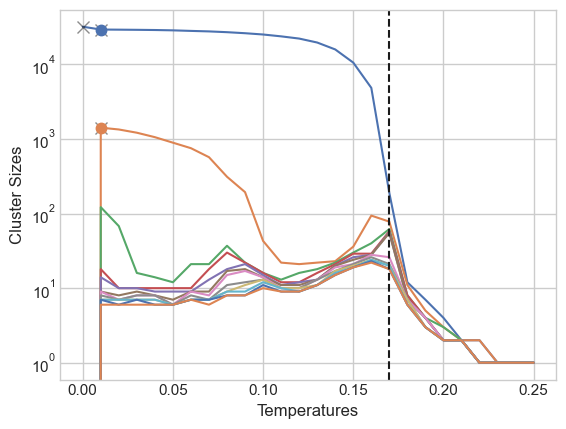

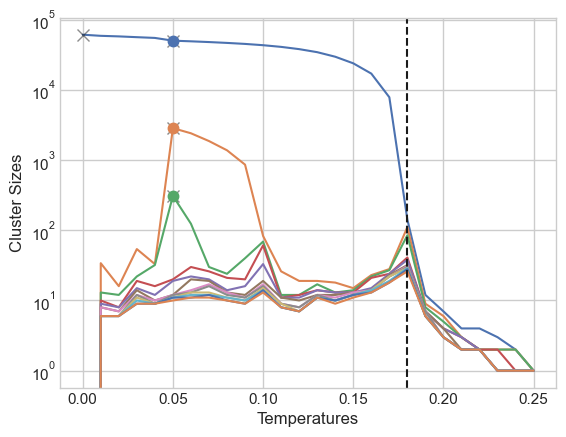

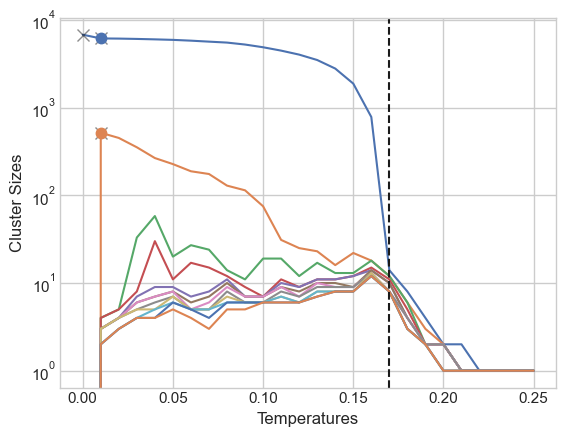

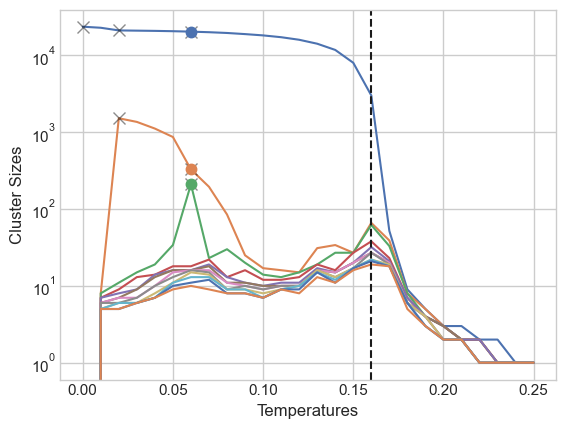

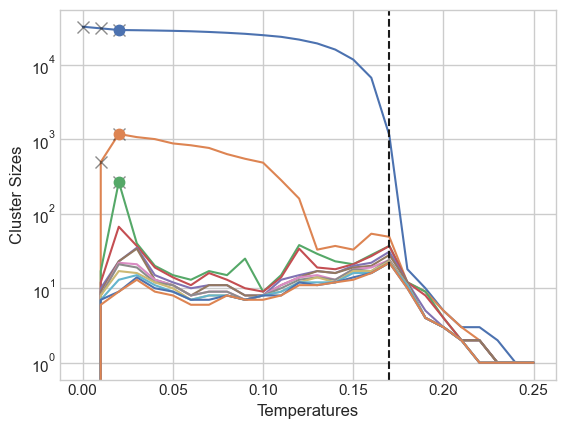

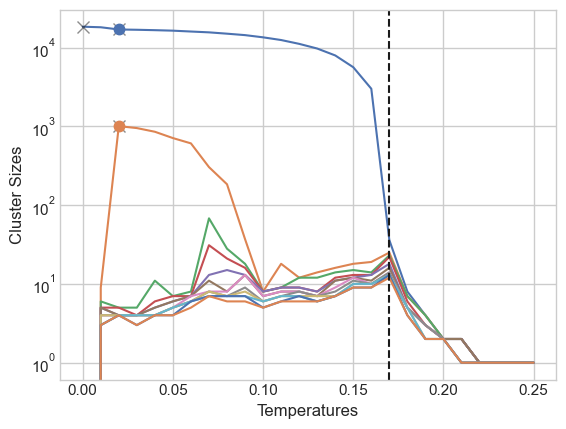

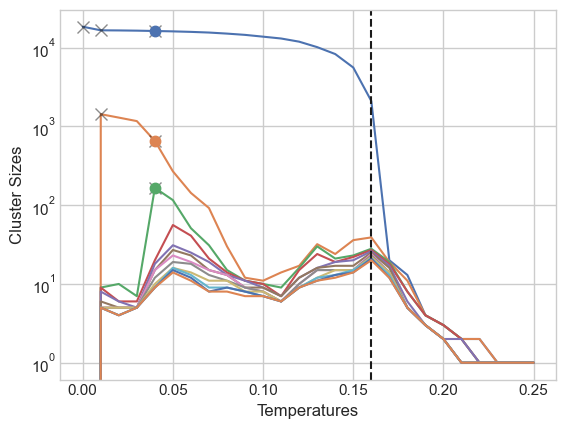

In [10]:
spike_sorting_pipeline(recording, 
                       recording_bp2, 
                       recording_bp4, 
                       bundle_dict,
                       artifact_removal=True,
                       save_dir=f'{OUTPUT_FOLDER}/{PROJECT_NAME}/')

# Quality Metrics

In [11]:
from quality import quality_metrics, compare_first_matrix, compare_second_matrix, finding_hits, hit_plots, merge_cluster, merge_plot, plots

/Users/masoudkhani/miniforge3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/masoudkhani/miniforge3/lib/python3.9/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [7]:
import spikeinterface as si
import spikeinterface.extractors as se

In [8]:
#recording_bp, waveform_folder, output_folder, matlab_sorting
waveform_folder = '/Users/masoudkhani/Documents/Programming/Spike-Packages/SpikeSorting/out/EMU-002_subj-MCW-FH_002_task-gaps/sorting/waveclus/output/wf_ch_260/waveforms'
matlab_sorting = '/Users/masoudkhani/Documents/Programming/Spike-Packages/SpikeSorting/out/EMU-002_subj-MCW-FH_002_task-gaps/sorting/waveclus/output/Channel_260_data.mat'

sorting1, pca1, metrics1, spike_amp1 = quality_metrics(recording_bp2,waveform_folder ,OUTPUT_FOLDER, matlab_sorting, 'figures_my_solution')


extract waveforms memmap:   0%|          | 0/31 [00:00<?, ?it/s]

In [63]:
#recording_bp, waveform_folder, output_folder, matlab_sorting
waveform_folder2 = '/Users/masoudkhani/Documents/Programming/Spike-Packages/SpikeSorting/out/EMU-002_subj-MCW-FH_002_task-gaps/sorting/waveclus/output/wf_ch_257/waveforms'
matlab_sorting2 = '/Users/masoudkhani/Documents/Programming/Spike-Packages/SpikeSorting/out/EMU-002_subj-MCW-FH_002_task-gaps/sorting/waveclus/output/Channel_257_data.mat'

sorting2, pca2, metrics2, spike_amp2 = quality_metrics(recording_bp2,waveform_folder2 ,OUTPUT_FOLDER, matlab_sorting2, 'figures_actual_solution')

extract waveforms memmap:   0%|          | 0/2 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/3 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/3 [00:00<?, ?it/s]

Computing PCA metrics:   0%|          | 0/3 [00:00<?, ?it/s]

extract amplitudes:   0%|          | 0/3601 [00:00<?, ?it/s]

In [116]:
first_matrix = f"{OUTPUT_FOLDER}/Comparison_matrix"
second_matrix = f"{OUTPUT_FOLDER}/Comparison_matrix"

table_data, cluster_act, cluster_my, percent = compare_first_matrix(sorting1, sorting2, matlab_sorting2, matlab_sorting,first_matrix, metrics1, metrics2)
table_data1, cluster_act1, cluster_my1, percent1 = compare_second_matrix(sorting1, sorting2, matlab_sorting2, matlab_sorting,second_matrix, metrics1, metrics2)

/Users/masoudkhani/miniforge3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/masoudkhani/miniforge3/lib/python3.9/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


First Matrix saved.
Matched percentages Above 80%
╒═══════════════════════════╤═══════════════════════╤════════════════════╕
│ Actual Solution Cluster   │ My Solution Cluster   │ Match Percentage   │
╞═══════════════════════════╪═══════════════════════╪════════════════════╡
│ Cluster 1.0               │ Cluster 1.0           │ 93.48%             │
╘═══════════════════════════╧═══════════════════════╧════════════════════╛
Second Matrix saved.
Matched percentages Above 80%
╒═══════════════════════╤═══════════════════════════╤════════════════════╕
│ My Solution Cluster   │ Actual Solution Cluster   │ Match Percentage   │
╞═══════════════════════╪═══════════════════════════╪════════════════════╡
│ Cluster 1.0           │ Cluster 1.0               │ 96.99%             │
╘═══════════════════════╧═══════════════════════════╧════════════════════╛


In [81]:
prob_hit_table, prob_clus_act, percent_my, prob_clus_my, percent_act = finding_hits(cluster_act, cluster_my, percent, cluster_act1, cluster_my1, percent1)

╒═════════════════════════════╤═════════════════════════╕
│ Actual Solution Cluster No. │ My Solution Cluster No. │
├─────────────────────────────┼─────────────────────────┤
│ 1.0                         │ 1.0                     │
╘═════════════════════════════╧═════════════════════════╛


/Users/masoudkhani/miniforge3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/masoudkhani/miniforge3/lib/python3.9/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


<__array_function__ internals>:180: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old behavior was intended.
<__array_function__ internals>:180: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old behavior was intended.


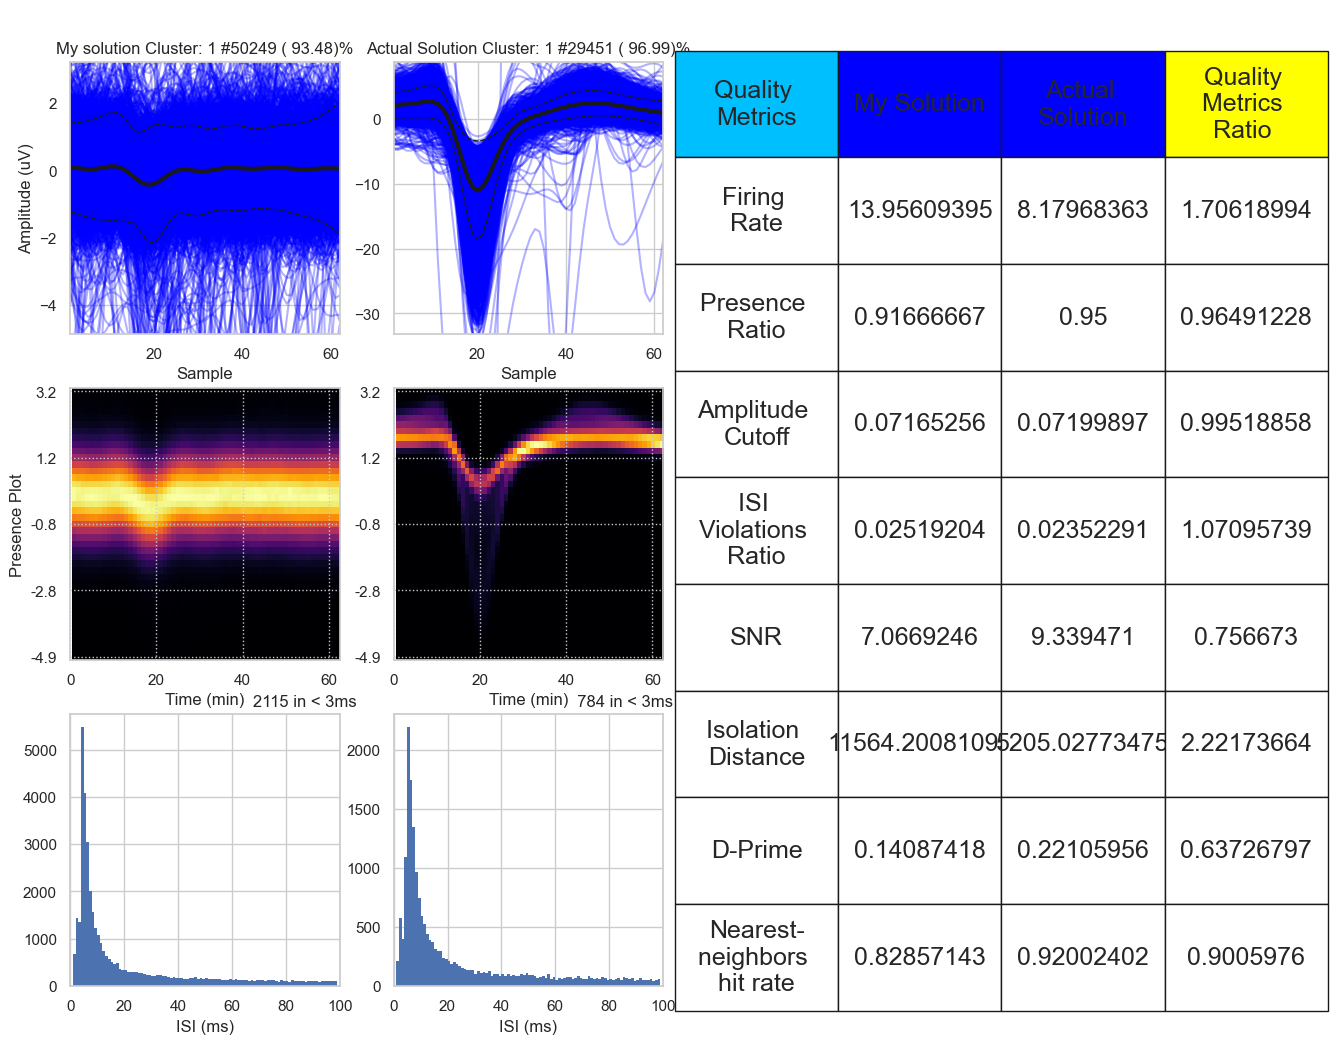

In [82]:
for i in range(0,len(prob_clus_act)):
    hit_plots(int(prob_clus_my[i]), int(prob_clus_act[i]), f'{percent_my[i]: .2f}',f'{percent_act[i]: .2f}', i, waveform_folder, waveform_folder2, metrics1, metrics2, OUTPUT_FOLDER)

<__array_function__ internals>:180: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old behavior was intended.
<__array_function__ internals>:180: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old behavior was intended.


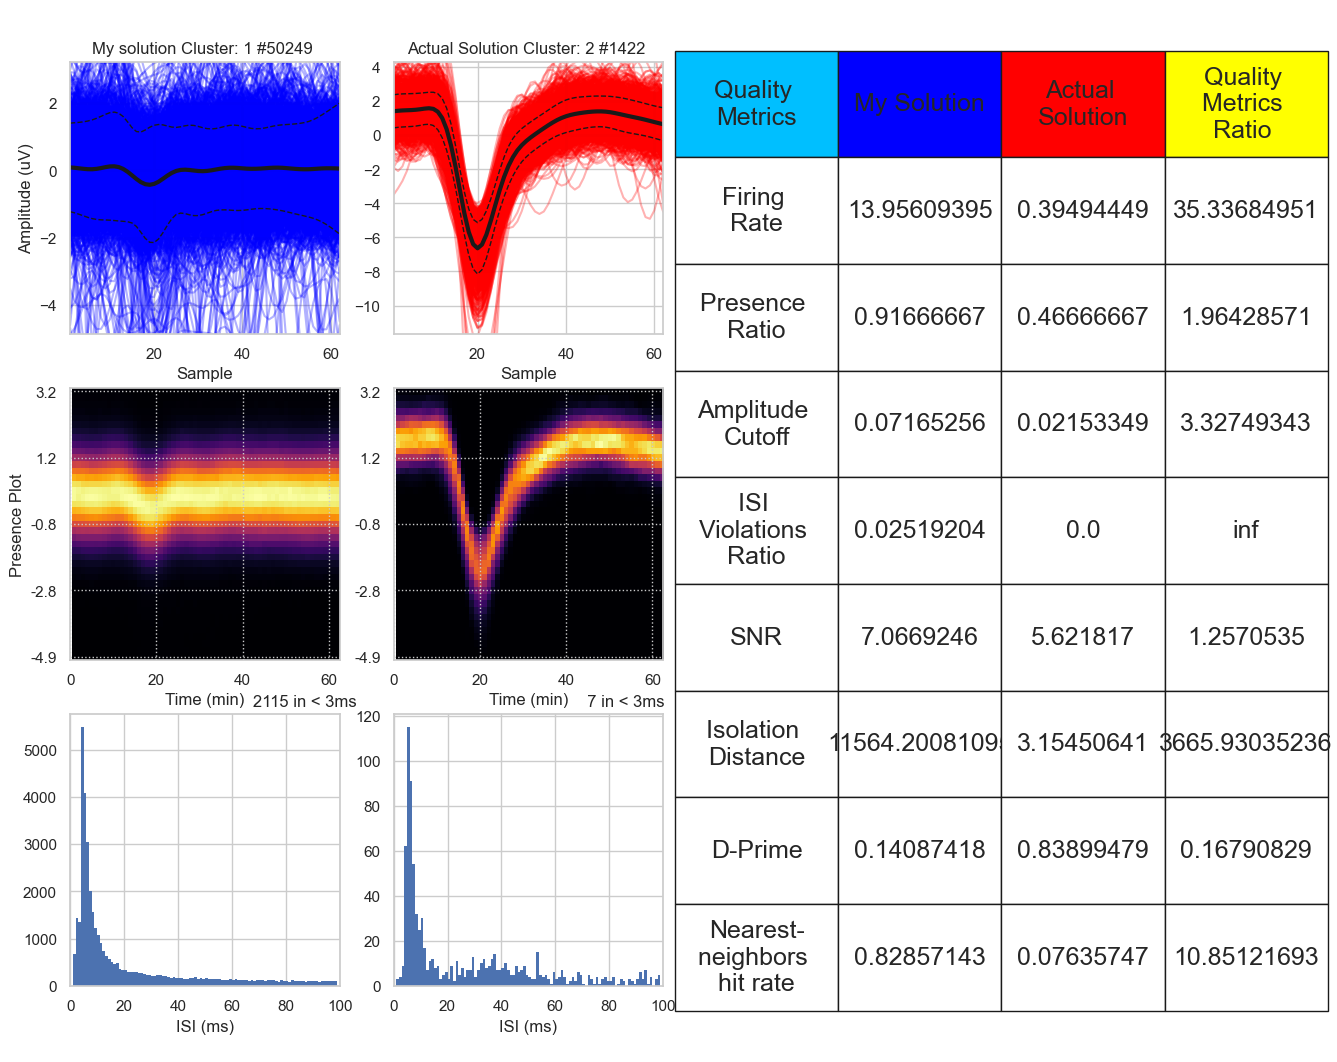

In [83]:
x= 1
y= 2
plots(x, y, 1, waveform_folder, waveform_folder2, metrics1, metrics2, OUTPUT_FOLDER)

# Merging

In [88]:
x = 1 # first cluster that we want to merge
y= 2 #second cluster that we want to merge

merged_times_matlab =merge_cluster(matlab_sorting2,OUTPUT_FOLDER, x, y)

Merged Sorting saved in: /Users/masoudkhani/Documents/Programming/Spike-Packages/SpikeSorting/out/times_results.mat


In [90]:
from pathlib import Path
#recording_bp, waveform_folder, output_folder, matlab_sorting
waveform_folder_my = waveform_folder/Path(f'Merged_{x}_{y}')
sorting3, pca3, metrics3, spike_amp3 = quality_metrics(recording_bp2,waveform_folder_my ,OUTPUT_FOLDER, merged_times_matlab, 'figures_merged_solution')

extract waveforms memmap:   0%|          | 0/2 [00:00<?, ?it/s]

Fitting PCA:   0%|          | 0/2 [00:00<?, ?it/s]

Projecting waveforms:   0%|          | 0/2 [00:00<?, ?it/s]

Computing PCA metrics:   0%|          | 0/2 [00:00<?, ?it/s]

extract amplitudes:   0%|          | 0/3601 [00:00<?, ?it/s]

/Users/masoudkhani/miniforge3/lib/python3.9/site-packages/seaborn/rcmod.py:400: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/Users/masoudkhani/miniforge3/lib/python3.9/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
<__array_function__ internals>:180: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old behavior was intended.
<__array_function__ internals>:180: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old behavior was intended.
<__array_function__ internals>:180: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(arr).nonzero()` if the old beha

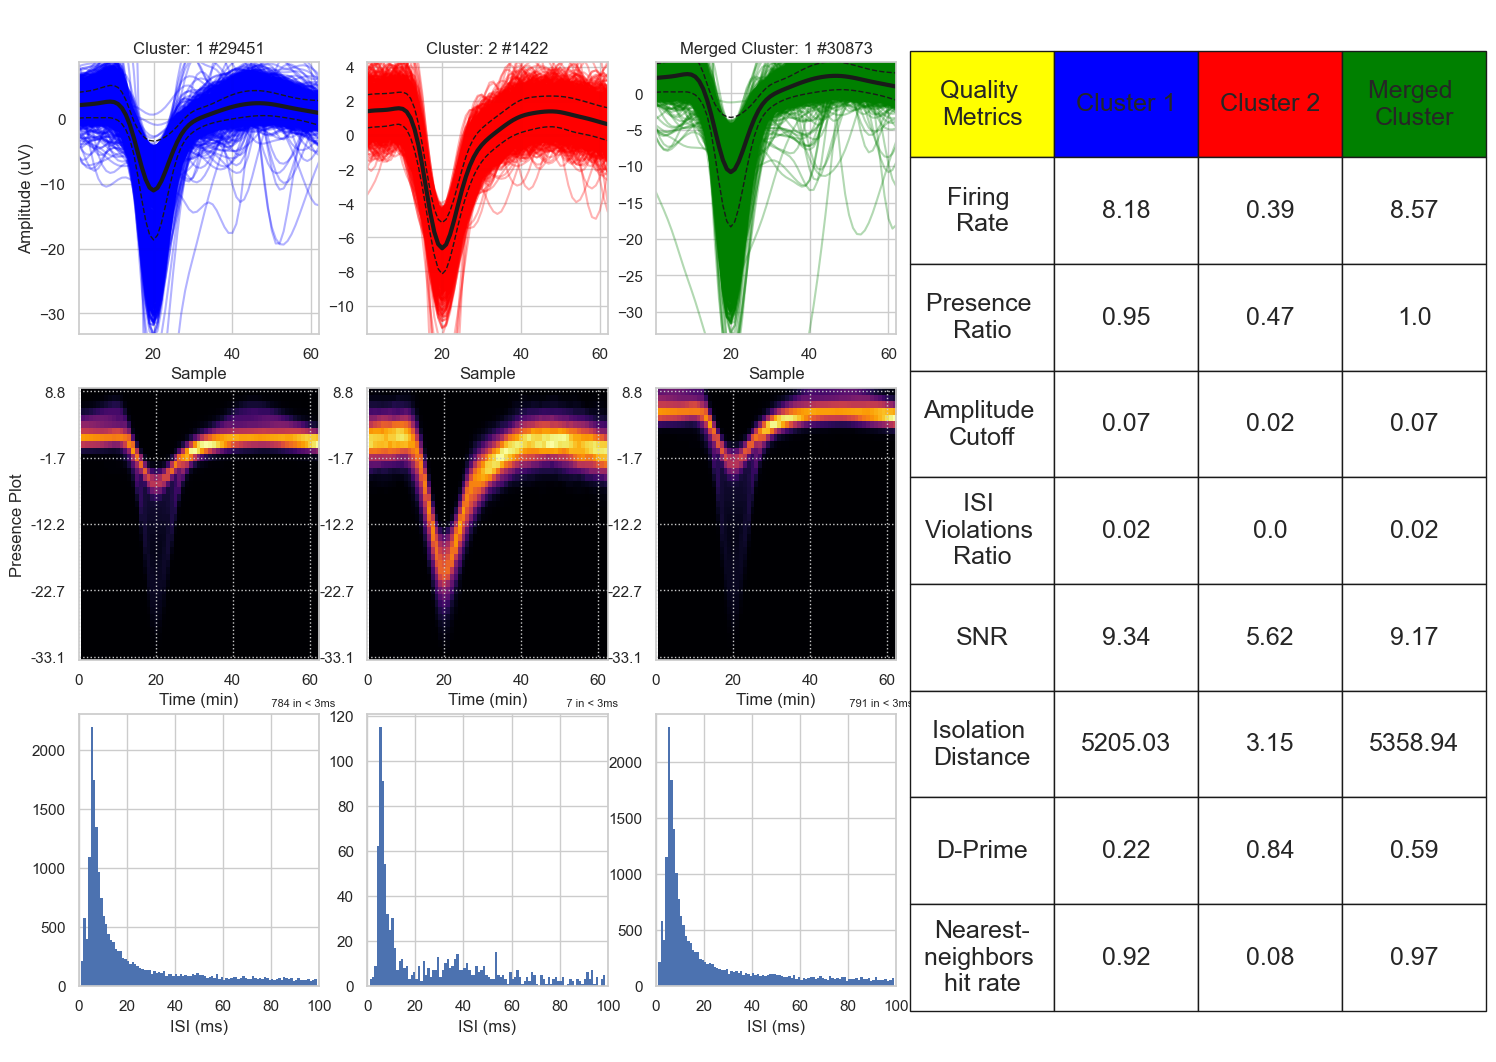

In [92]:
merge_plot(x, y, x, waveform_folder2, waveform_folder_my, metrics2, metrics3)